In [1]:
import pandas as pd

import persiantools
from persiantools.jdatetime import JalaliDate

df = pd.read_excel("./Data/CleanData.xlsx")

In [2]:
fa_month = {"فروردین" : 1 , 
"اردیبهشت" : 2 , 
"خرداد" : 3 , 
"تیر" :  4, 
"مرداد" :  5, 
"شهریور" :  6, 
"مهر" :  7, 
"آبان" :  8, 
"آذر" :  9, 
"دی" : 10 , 
"بهمن" : 11 , 
"اسفند" :  12, 
}

In [3]:
def jalali_to_m (date):
    year , day , month = date.split('-')
    changed_date = JalaliDate(int(year) ,fa_month[month]  , int(day)).to_gregorian()
    return changed_date

In [4]:
df_numbers = df[['Date' , 'Milage' , "Price" , "Order"]]

In [5]:
df_numbers["MDate"] = df_numbers["Date"].apply(jalali_to_m)

C:\Users\Esfandiari\AppData\Local\Temp\ipykernel_1808\1604956085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numbers["MDate"] = df_numbers["Date"].apply(jalali_to_m)


In [6]:
df_numbers.set_index('MDate' , inplace = True)

In [7]:
df_numbers.sort_index(inplace = True)

C:\Users\Esfandiari\AppData\Local\Temp\ipykernel_1808\3376274116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numbers.sort_index(inplace = True)


<Axes: xlabel='MDate'>

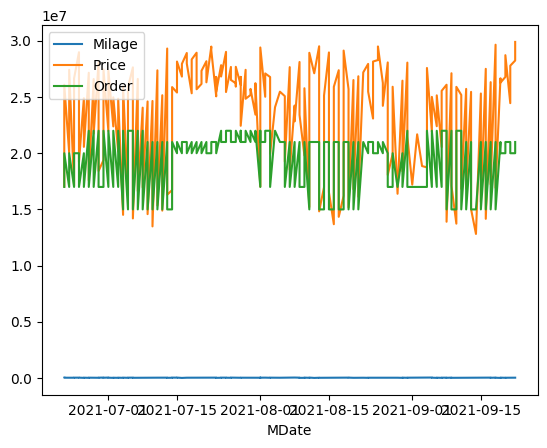

In [8]:
df_numbers.plot()

In [9]:
df_numbers["Expanded"] = df_numbers['Price'].expanding().sum()

C:\Users\Esfandiari\AppData\Local\Temp\ipykernel_1808\147660602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numbers["Expanded"] = df_numbers['Price'].expanding().sum()


In [10]:
df_numbers['Rolling5'] = df_numbers['Price'].rolling(5).sum()

C:\Users\Esfandiari\AppData\Local\Temp\ipykernel_1808\3840824101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numbers['Rolling5'] = df_numbers['Price'].rolling(5).sum()


<Axes: xlabel='MDate'>

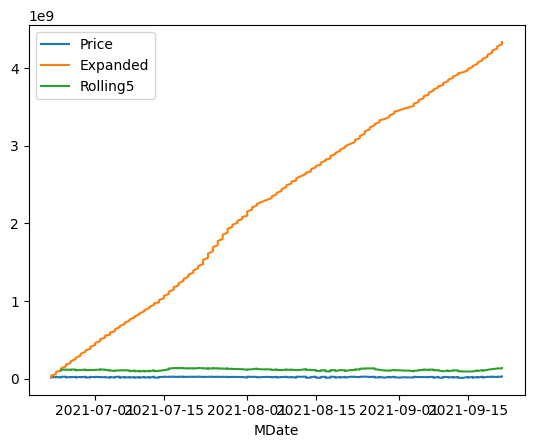

In [14]:
df_numbers[['Price' , "Expanded" , "Rolling5"]].plot()

array([[<Axes: title={'center': 'Order'}>]], dtype=object)

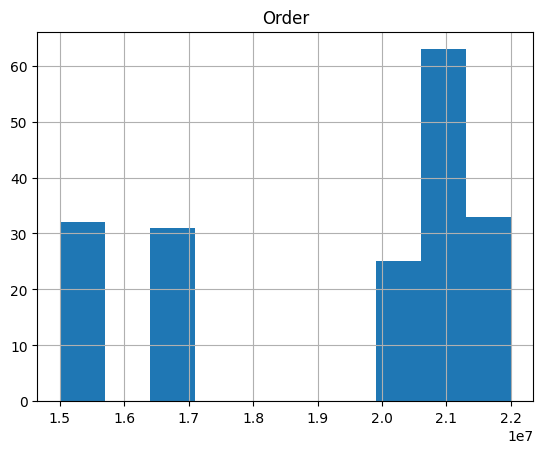

In [15]:
df_numbers[["Order"]].hist()

In [17]:
df_numbers.index

Index([2021-06-22, 2021-06-22, 2021-06-23, 2021-06-23, 2021-06-24, 2021-06-24,
       2021-06-25, 2021-06-25, 2021-06-26, 2021-06-26,
       ...
       2021-09-18, 2021-09-18, 2021-09-19, 2021-09-19, 2021-09-20, 2021-09-20,
       2021-09-21, 2021-09-21, 2021-09-22, 2021-09-22],
      dtype='object', name='MDate', length=184)

In [18]:
df_numbers.index = pd.to_datetime(df_numbers.index)

In [19]:
df_numbers.index

DatetimeIndex(['2021-06-22', '2021-06-22', '2021-06-23', '2021-06-23',
               '2021-06-24', '2021-06-24', '2021-06-25', '2021-06-25',
               '2021-06-26', '2021-06-26',
               ...
               '2021-09-18', '2021-09-18', '2021-09-19', '2021-09-19',
               '2021-09-20', '2021-09-20', '2021-09-21', '2021-09-21',
               '2021-09-22', '2021-09-22'],
              dtype='datetime64[ns]', name='MDate', length=184, freq=None)

<Axes: xlabel='MDate'>

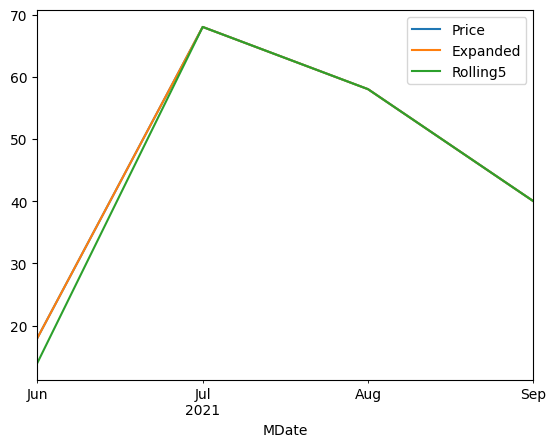

In [25]:
df_numbers.resample("1M").count()[['Price' , "Expanded" , "Rolling5"]].plot()